In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [10]:
# split data
x=df.drop('cut',axis=1)
y=df['cut']
le=LabelEncoder()
x['color']=le.fit_transform(x['color'])
x['clarity']=le.fit_transform(x['clarity'])
x['depth']=le.fit_transform(x['depth'])
y=le.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
# train the decesion tree model
%%time
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='micro'))
print('Recall Score:',recall_score(y_test,y_pred,average='micro'))
print('F1 Score:',f1_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.7065257693733779
Precision Score: 0.7065257693733779
Recall Score: 0.7065257693733779
F1 Score: 0.7065257693733779
CPU times: user 496 ms, sys: 4.96 ms, total: 501 ms
Wall time: 503 ms


In [6]:
# train the random forest model
%%time
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='micro'))
print('Recall Score:',recall_score(y_test,y_pred,average='micro'))
print('F1 Score:',f1_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.7862439747868002
Precision Score: 0.7862439747868002
Recall Score: 0.7862439747868002
F1 Score: 0.7862439747868002
CPU times: user 12.5 s, sys: 177 ms, total: 12.7 s
Wall time: 12.7 s


In [12]:
# train the xgboost model
%%time
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred,average='micro'))
print('Recall Score:',recall_score(y_test,y_pred,average='micro'))
print('F1 Score:',f1_score(y_test,y_pred,average='micro'))

Accuracy Score: 0.7980163144234335
Precision Score: 0.7980163144234335
Recall Score: 0.7980163144234335
F1 Score: 0.7980163144234335
CPU times: user 4.79 s, sys: 49 ms, total: 4.84 s
Wall time: 2.53 s


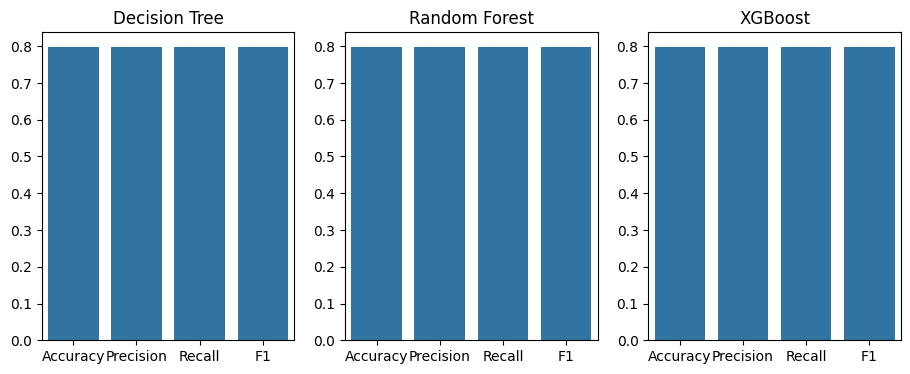

In [13]:
#  make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.barplot(x=['Accuracy','Precision','Recall','F1'], y=[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred,average='micro'),recall_score(y_test,y_pred,average='micro'),f1_score(y_test,y_pred,average='micro')])
plt.title('Decision Tree')
plt.subplot(1,4,2)
sns.barplot(x=['Accuracy','Precision','Recall','F1'], y=[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred,average='micro'),recall_score(y_test,y_pred,average='micro'),f1_score(y_test,y_pred,average='micro')])
plt.title('Random Forest')
plt.subplot(1,4,3)
sns.barplot(x=['Accuracy','Precision','Recall','F1'], y=[accuracy_score(y_test,y_pred),precision_score(y_test,y_pred,average='micro'),recall_score(y_test,y_pred,average='micro'),f1_score(y_test,y_pred,average='micro')])
plt.title('XGBoost')
plt.show()